# Import Necessary Libraries

In [1]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [2]:
np.random.seed(42)

# Implementing a class

In [3]:
class simple_nn(object):
    def __init__(self) -> None:
        """
        Create an object of your neural network model
        """
        print(f'Your object of nn has been made!')

    def _forward(self, W_1:np.array, W_2:np.array, X:np.array) -> dict:
        """
        Compute the activations backward!
        Parameters: 
            - X: Input vectors contain N samples and D features. Shape is: [N, D]
            - W_1: Weigths between input layer and hidden layer, shape of W_1 is [M, D]
            - W_2: Weights between hidden layer and output layer, shape of W_2 is [1, M]
        Return:
            A dictitonary where
            1. Contain a N*1 vector for predicting given samples(y_pred)
            2. Contain a N*M matrix for activations of hidden neurons(Z) 
        """

        a = np.dot(X, W_1.T)
        z = self._activation_computation(a)
        y_in = np.dot(z, W_2.T)
        y_preds = y_in
        return z, y_preds

    def backward(self, X:np.array, y:np.array, M:int, iters:int, lr:float) -> dict:
        """
        Create your model here with given X,y for train set and train it.
        Parameters: 
            X: Train samples. Shape is [N, D]
            y: Ground labels Shape is [N, 1]
            M: Number of neurons in hidden layer.
            iters: Number of iterations for learning
            lr: Learning rate 
        Return:
            W_1, W_2: weights between layers
            error_over_time: error over iterations. Shape is [iter, 1]
        """
        W_1 = np.random.rand(M, X.shape[1])
        W_2 = np.random.rand(1, M)
        error_over_time = [0 for i in range(iters)]
        for i, _ in tqdm(enumerate(range(iters))):
            error = 0
            for idx, sample in enumerate(X):
                z, y_preds = self._forward(W_1=W_1, W_2=W_2, X=sample)
                error += (1/2)*np.square(np.subtract(y_preds, y[idx].reshape(1)))
                W_1, W_2 = self._backpropagation(W_1=W_1, W_2=W_2, target=y[idx], net_output=y_preds, z=z, lr=lr, sample=sample)
            error_over_time[i] = error
        return W_1, W_2, error_over_time

    def _backpropagation(self, W_1:np.array, W_2:np.array, target:np.array, net_output:np.array, z:np.array, lr:float, sample:np.array) -> tuple:
        """
        Back propagating the loss error and calculate the gradients
        Parameters:
            W_1: Current weigths between input and hidden layers
            W_2: Current weights between hidden and output layers
            error: calculated error for network
        Return:
            W_1: Updated weights between input and hidden layers
            W_2: Updated weights between hidden and output layers
        """
        target = target.reshape(1)
        delta_last_layer =  net_output - target
        delta_hidden_layer = (1-np.square(z)) * (W_2 * delta_last_layer )
        new_W_1, new_W_2 = np.copy(W_1), np.copy(W_2)
        new_W_2 -= lr * delta_last_layer * z
        new_W_1 -= lr * np.dot(delta_hidden_layer.T, sample.reshape(-1, 1).T) 
        return new_W_1, new_W_2

    def _activation_computation(self, a:np.array) -> np.array:
        """
        Compute activation function for weigths
        """
        return np.tanh(a)

In [4]:
red_wine = fetch_openml(name="wine-quality-red", as_frame=True)

In [5]:
red_wine_df = red_wine.frame

In [6]:
red_wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
red_wine_df.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
class                   category
dtype: object

In [8]:
train, test = train_test_split(red_wine_df, test_size=0.5, stratify=red_wine_df['class'], shuffle=True, random_state=42)

In [9]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
1434,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
507,11.2,0.67,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6
1566,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1182,10.2,0.40,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,6
1131,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5


In [10]:
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
279,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,7
735,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
1448,6.9,0.580,0.01,1.9,0.080,40.0,54.0,0.99683,3.40,0.73,9.7,5
779,7.1,0.520,0.03,2.6,0.076,21.0,92.0,0.99745,3.50,0.60,9.8,5


In [11]:
len(train), len(test)

(799, 800)

In [12]:
class_column = red_wine_df.columns.get_loc("class")
class_column

11

In [13]:
X_train = train.drop('class', axis=1).to_numpy()
y_train = train['class'].astype(int).to_numpy()
X_test = test.drop('class', axis=1).to_numpy()
y_test = test['class'].astype(int).to_numpy()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(799, 11) (799,) (800, 11) (800,)


In [14]:
mean_features = X_train.mean(axis=0)
std_features = np.sqrt(X_train.var(axis=0))

In [15]:
X_train_standardized = (X_train - mean_features)/std_features
X_train_standardized.mean(axis=0), X_train_standardized.var(axis=0)

(array([-7.65901040e-16,  2.21210896e-16,  1.11161254e-17,  2.49001209e-16,
        -1.31170280e-16, -5.78038521e-17, -8.11477154e-17,  5.70568485e-14,
         3.07249706e-15, -4.17966315e-16,  1.56737368e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [16]:
X_test_standardized = (X_test - mean_features)/std_features
X_test_standardized.mean(axis=0), X_test_standardized.var(axis=0)

(array([-0.04805598, -0.05048172, -0.04135128,  0.02502176, -0.05749009,
         0.00263596, -0.01865503, -0.04728287,  0.06594329, -0.11366828,
        -0.00317128]),
 array([1.02624234, 0.96690357, 1.00986916, 1.38620228, 0.68586448,
        0.98417131, 1.02452279, 1.02933616, 1.01666438, 0.59363098,
        0.99227844]))

In [17]:
params = {
    'n_neurons': 30,
    'iter': 1000,
    'lr': 0.01
}

In [18]:
model = simple_nn()

Your object of nn has been made!


In [19]:
W_1, W_2, errors = model.backward(
    X=X_train_standardized,
    y=y_train,
    M=params['n_neurons'],
    iters=params['iter'],
    lr=params['lr']
)

0it [00:00, ?it/s]

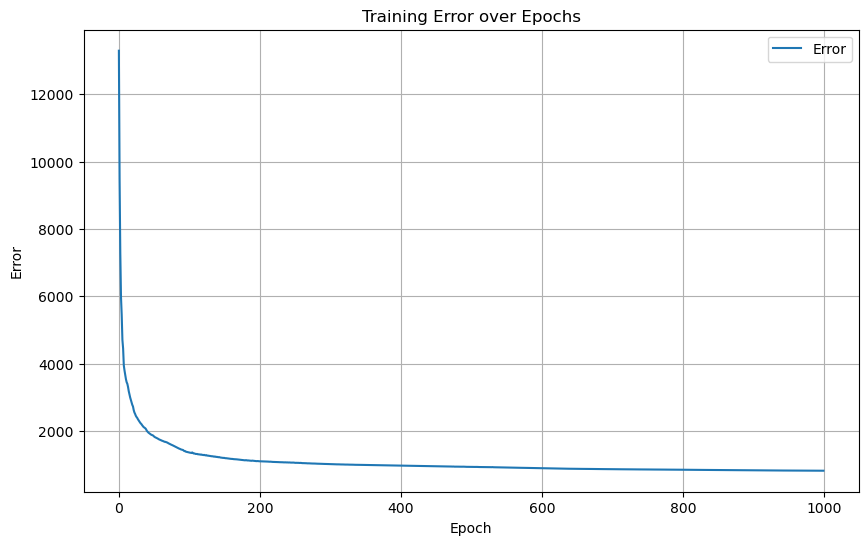

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
_, preds = model._forward(W_1=W_1, W_2=W_2, X=X_test_standardized)

In [22]:
print(f'root mean square error: {root_mean_squared_error(y_true=y_test, y_pred=preds)}')

root mean square error: 4.098029149338868


In [23]:
learning_rate = [0.01, 0.001, 0.0001, 0.00001]

0it [00:00, ?it/s]

root mean square error: 4.061898238211912 for lr=0.01


0it [00:00, ?it/s]

root mean square error: 3.9433028564976125 for lr=0.001


0it [00:00, ?it/s]

root mean square error: 2.978595360180492 for lr=0.0001


0it [00:00, ?it/s]

root mean square error: 3.968004766332891 for lr=1e-05


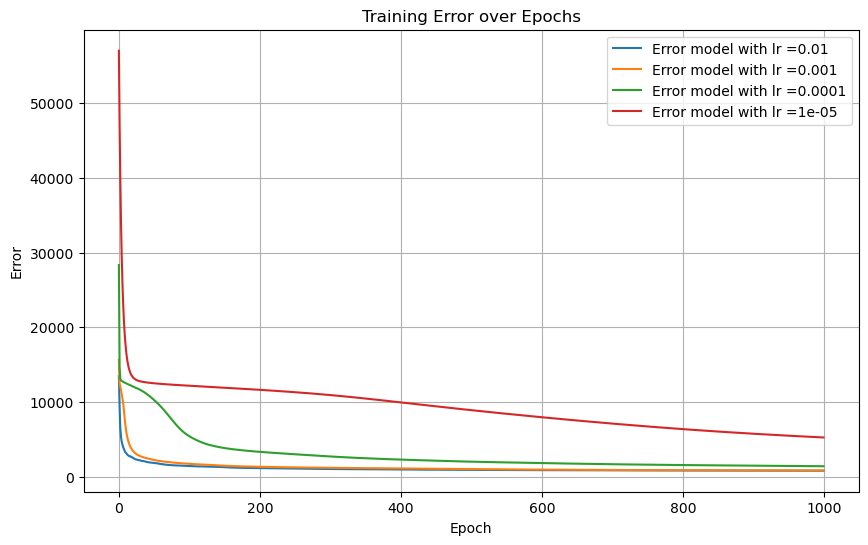

In [24]:
plt.figure(figsize=(10, 6))
for lr in learning_rate:
    W_1, W_2, errors = model.backward(
        X=X_train_standardized,
        y=y_train,
        M=params['n_neurons'],
        iters=params['iter'],
        lr=lr
    )
    _, preds = model._forward(W_1=W_1, W_2=W_2, X=X_test_standardized)
    print(f'root mean square error: {root_mean_squared_error(y_true=y_test, y_pred=preds)} for lr={lr}')
    plt.plot(errors, label=f'Error model with lr ={lr}')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error over Epochs')
plt.legend()
plt.grid(True)
plt.show()